# This is a notebook where I try out different python libraries, packages etc.

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
A = np.random.randn(30, 20) # A -> 30 * 20
b = np.random.randn(30)

In [3]:
A

array([[ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01,
        -1.07296862e+00,  8.65407629e-01, -2.30153870e+00,
         1.74481176e+00, -7.61206901e-01,  3.19039096e-01,
        -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
        -3.22417204e-01, -3.84054355e-01,  1.13376944e+00,
        -1.09989127e+00, -1.72428208e-01, -8.77858418e-01,
         4.22137467e-02,  5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00,  9.01590721e-01,
         5.02494339e-01,  9.00855949e-01, -6.83727859e-01,
        -1.22890226e-01, -9.35769434e-01, -2.67888080e-01,
         5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
        -6.87172700e-01, -8.45205641e-01, -6.71246131e-01,
        -1.26645989e-02, -1.11731035e+00,  2.34415698e-01,
         1.65980218e+00,  7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01, -7.47158294e-01,
         1.69245460e+00,  5.08077548e-02, -6.36995647e-01,
         1.90915485e-01,  2.10025514e+00,  1.20158952e-01,
         6.17203110e-01,  3.0

In [4]:
x = cp.Variable(20)

In [5]:
objective = cp.Minimize(cp.sum_squares(A*x - b))

In [6]:
constraints = [x>=0,  x<=1]
prob = cp.Problem(objective, constraints)

In [7]:
result = prob.solve()
print(prob.status)
print(result)

optimal
19.83126370644502


New Problem

# Max 3x1 + 2x2 = z 
subject to
2x1 + x2 <= 6
7x1 + 8x2 <= 28
x1 >= 0, x2 >= 0

c(transpose) = [3, 2]
A = [[2, 1], [7, 8]]

In [8]:
x = cp.Variable(2) # [x1, x2]
c = np.array([3, 2])

A = np.array([[2, 1], [7, 8]])
b = np.array([6, 28])

In [9]:
z = A * x <= b
constraints = []
constraints.append(z)
constraints.append(x >= 0)
objective = cp.Maximize(c.T * x)

In [10]:
prob = cp.Problem(objective, constraints)

In [11]:
result = prob.solve()
print(prob.status)
print(result)
print(x.value)

optimal
9.777777777777777
[2.22222222 1.55555556]


In [12]:
a = np.diag([1, 2, 3, 4, 5])

In [13]:
np.sum(a[2:4, 2:4]) # Learning how to index submatrices

7

In [14]:
a = np.array([3, 3, 3])
x = cp.Variable(3)

In [15]:
constraints = [cp.sum(x) == 57]
p = cp.Problem(cp.Maximize(a.T * x), constraints)

In [16]:
result = p.solve()
print(x.value)
print(result)

[19. 19. 19.]
171.0


# Bala's algorithm example

In [17]:
c = np.array([3, 5, 6, 9, 10, 10])
x = cp.Variable(6, boolean = True)
A = np.array([
    [-2, 6, -3, 4, 1, -2],
    [-5, -3, 1, 3, -2, 1],
    [5, -1, 4, -2, 2, -1]
])
b = np.array([2, -2, 3])

In [18]:
objective = cp.Minimize(c.T * x)
constraints = [ A @ x >= b ]
# constraints = [ A @ x >= b , x[3] == 1] Can manually set one value
p = cp.Problem(objective, constraints)

In [19]:
result = p.solve()
print(result)
print(x.value)

11.0
[0. 1. 1. 0. 0. 0.]


In [20]:
x = cp.Variable((3, 3))

In [21]:
B = np.diag([3, 3, 3])
print(B.shape)
objective = cp.Maximize(x[0][0])
constraints = [ cp.sum(x[0: 2, 0: 3]) == 23 ]
c = [x <= 10]
constraints.extend(c)
p = cp.Problem(objective, constraints)

(3, 3)


In [22]:
result = p.solve()
print(p.status)

optimal


In [23]:
print(x.value)

[[10.   2.6  2.6]
 [ 2.6  2.6  2.6]
 [-0.  -0.  -0. ]]


In [24]:
x.value[0][0] == 10

True

In [25]:
# Create two scalar optimization variables.
x = [ cp.Variable() for i in range(0, 2)]

# Create two constraints.
sum = 0
for i in range(len(x)):
    sum += x[i]
constraints = [sum == 2,
               x[0] - x[1] >= 1]

# Form objective.
obj = cp.Minimize((x[0] - x[1])**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

# The optimal dual variable (Lagrange multiplier) for
# a constraint is stored in constraint.dual_value.
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
print("x - y value:", (x[0] + x[1]).value)

optimal (x + y == 1) dual variable 0.0
optimal (x - y >= 1) dual variable 2.0
x - y value: 2.0


In [27]:
intersection_matrix = np.random.randint(0, 10, size=(15, 15))


[]

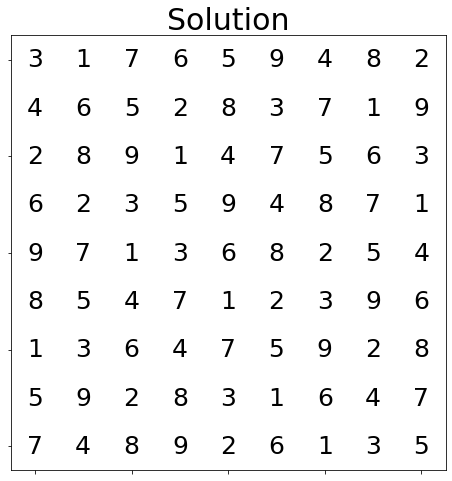

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

min_val, max_val = 0, 15

x = np.array([[3, 1, 7, 6, 5, 9, 4, 8, 2],
 [4, 6, 5, 2, 8, 3, 7, 1, 9],
 [2, 8, 9, 1, 4, 7, 5, 6, 3],
 [6, 2, 3, 5, 9, 4, 8, 7, 1],
 [9, 7, 1, 3, 6, 8, 2, 5, 4],
 [8, 5, 4, 7, 1, 2, 3, 9, 6],
 [1, 3, 6, 4, 7, 5, 9, 2, 8],
 [5, 9, 2, 8, 3, 1, 6, 4, 7],
 [7, 4, 8, 9, 2, 6, 1, 3, 5]])

plt.rcParams["font.size"] = "25"

for i in range(9):
    for j in range(9):
        c = x[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
        
        
ax.imshow(x, alpha = 0, cmap=None)
ax.set_title("Solution")
ax.set_yticklabels([])
ax.set_xticklabels([])

In [ ]:
print(intersection_matrix[0, 0])

In [3]:
a = np.array([
    [2,4],
    [1, 3],
    [1, 2],
    [3, 0],
    [4.5, 1.5]
])

In [4]:
print(a)

[[2.  4. ]
 [1.  3. ]
 [1.  2. ]
 [3.  0. ]
 [4.5 1.5]]


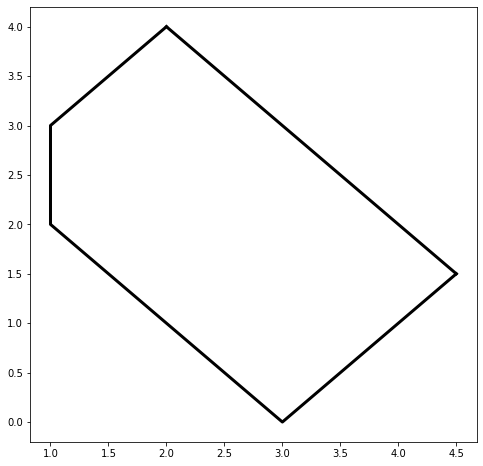

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(a[:,0], a[:,1], linewidth=3, color="black")
ax.plot([a[0, 0], a[-1,0]], [a[0, 1], a[-1, 1]], linewidth=3, color="black")

In [7]:
def get_equations(a):
    A = []
    b = []
    for i in range(-1, a.shape[0] - 1):
        r = [ - a[i][1] + a[i+1][1], a[i][0] - a[i+1][0] ]
        c = a[i][0] * a[i+1][1] - a[i][1] * a[i+1][0]
        A.append(r)  
        b.append(c)
    return np.array(A), np.array(b)

A, b = get_equations(a)

In [8]:
print(A, b)

[[ 2.5  2.5]
 [-1.   1. ]
 [-1.   0. ]
 [-2.  -2. ]
 [ 1.5 -1.5]] [15.   2.  -1.  -6.   4.5]


In [18]:
print(np.linalg.norm(A[1]))

1.4142135623730951


In [59]:
x = cp.Variable(2)
line_number = 4
objective = cp.Maximize((- A[line_number] * x.T + b[line_number]) / np.linalg.norm(A[line_number]) )
constraints = [A @ x.T <= b] # Point is inside the polygon
value = (- A[line_number] @ x.T + b[line_number]) / np.linalg.norm(A[line_number])
for i in range(0, a.shape[0]):
    if i == line_number:
        continue
    dist_other = (- A[i] @ x + b[i]) / np.linalg.norm(A[i])
    constraints.append(value <= dist_other)
prob = cp.Problem(objective, constraints)
_ = prob.solve()
print(x.value)

[3.  1.5]


In [60]:
center = x.value
radius = (- A[0] @ center.T + b[0] ) / np.linalg.norm(A[0])
print(center, radius)

[3.  1.5] 1.0606601717798212


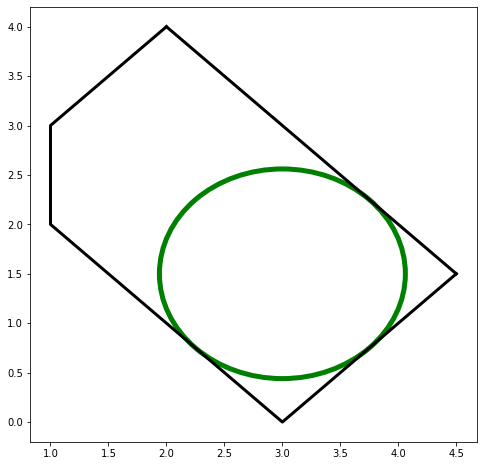

In [61]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(a[:,0], a[:,1], linewidth=3, color="black")
ax.plot([a[0, 0], a[-1,0]], [a[0, 1], a[-1, 1]], linewidth=3, color="black")
circle1 = plt.Circle(center, radius, fill = None, linewidth=5, color="green")
ax.add_artist(circle1)